# Bay Area 2bd Rental Example

In [50]:
import json
with open('./map_info.json', 'r') as f:
    map_info = json.loads(f.read())
coords = map_info
image_size = [coords.pop('width'), coords.pop('height')]
long2px = lambda x: (x - coords['westLong']) / (coords['eastLong'] - coords['westLong']) * image_size[0]
lat2px = lambda y: (1 - (y - coords['southLat']) / (coords['northLat'] - coords['southLat'])) * image_size[1]

## Parsing data using Pandas

In [51]:
import pandas as pd

In [52]:
markers = pd.io.json.read_json('./markers.json')

In [53]:
markers[:10]

,id,lat,lng,priority,type
0,178140728,37.665680,-122.476628,2.262176,1
1,178122333,37.602034,-122.397793,2.113114,1
2,219984782,37.672215,-122.467193,1.063247,1
3,220211316,37.634048,-122.422392,1.053928,1
4,219768715,37.654900,-122.432000,0.935263,1
5,210992005,37.654300,-122.492700,0.925521,1
6,219986388,37.692476,-122.415958,0.889259,1
7,204829651,37.675700,-122.474200,0.867807,1
8,212453950,37.658000,-122.477900,0.865410,1
9,204829127,37.605500,-122.425500,0.862811,1


In [54]:
listings = pd.io.json.read_json('./listings.json')
listings[:10]

,aptType,area,baths,beds,cats,comp,contactName,date,description,directPost,...,listingType,lng,location,locationPrecision,phone,price,priority,source,sourceName,url
0,1,,2,2,1,0,,2014-03-23 19:59:36,2BR/2BA Apartment,False,...,abo,-122.395112,"355 Berry Street, San Francisco, CA, 94158, USA",8,,5249,1.672490,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
1,1,,2,2,1,0,,2014-03-23 20:58:06,2BR/2BA Apartment,False,...,abo,-122.397793,"509 Poplar Avenue, Millbrae, CA, 94030, USA",8,,2705,2.113114,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
2,1,,2,2,1,0,,2014-03-23 23:01:25,2BR/2BA Apartment,False,...,abo,-122.476628,"862 Campus Dr, Daly City, CA, 94015, USA",8,,2075,2.262176,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
3,1,,1,2,1,0,,2014-03-23 23:44:56,2BR/1BA Apartment,False,...,abo,-122.499397,"515 John Muir Drive, San Francisco, CA, 94132,...",8,,2839,1.986811,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
4,1,,2,2,1,0,,2014-03-24 00:26:39,2BR/2BA Apartment,False,...,abo,-122.455841,"1200 Ocean Avenue, San Francisco, CA, 94112, USA",8,,3420,1.950520,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
5,1,,2,2,1,0,,2014-03-25 19:26:21,2BR at Pacific Place Apartments,False,...,abo,-122.415900,,8,,2950,0.781451,11,Rent.com,http://www.rent.com/account/register/referral/...
6,1,,1,2,0,0,,2014-07-21 07:17:40,2BR at Clubview,False,...,abo,-122.435600,,8,,2553,0.767749,11,Rent.com,http://www.rent.com/account/register/referral/...
7,1,,2,2,0,0,,2014-10-12 11:26:12,2BR/2BA,False,...,abo,-122.425500,"2000 Crystal Springs Road , SAN BRUNO, CA, 94066",8,(650) 458-5218,2700,0.862811,12,ApartmentFinder.com,http://www.apartmentfinder.com/California/San-...
8,1,,1,2,0,0,,2014-10-12 11:26:13,2BR/1BA,False,...,abo,-122.480500,"333 Park Plaza Dr, DALY CITY, CA, 94015",8,(415) 890-4588,2295,0.855192,12,ApartmentFinder.com,http://www.apartmentfinder.com/California/Daly...
9,1,,2,2,0,0,,2014-10-12 11:26:30,2BR/2BA,False,...,abo,-122.474200,"1580 Southgate Ave , DALY CITY, CA, 94015",8,(650) 239-6976,2095,0.867807,12,ApartmentFinder.com,http://www.apartmentfinder.com/California/Daly...


In [55]:
df = markers.merge(listings, 'outer', 'id')
df

,id,lat_x,lng_x,priority_x,type,aptType,area,baths,beds,cats,...,listingType,lng_y,location,locationPrecision,phone,price,priority_y,source,sourceName,url
0,178140728,37.665680,-122.476628,2.262176,1,1,,2,2,1,...,abo,-122.476628,"862 Campus Dr, Daly City, CA, 94015, USA",8,,2075,2.262176,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
1,178140728,37.665680,-122.476628,2.262176,1,1,,2,2,1,...,abo,-122.476628,"862 Campus Dr, Daly City, CA, 94015, USA",8,,2075,2.262176,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
2,178122333,37.602034,-122.397793,2.113114,1,1,,2,2,1,...,abo,-122.397793,"509 Poplar Avenue, Millbrae, CA, 94030, USA",8,,2705,2.113114,105,ApartmentSearch.com,http://www.apartmentsearch.com/apartments/Cali...
3,219984782,37.672215,-122.467193,1.063247,1,2,South San Francisco,0,2,0,...,abo,-122.467193,"Dockside Drive, Daly City, CA 94014, United St...",8,,2339,1.063247,59,Airbnb,https://www.airbnb.com/rooms/1638267?checkin=2...
4,219984782,37.672215,-122.467193,1.063247,1,2,South San Francisco,0,2,0,...,abo,-122.467193,"Dockside Drive, Daly City, CA 94014, United St...",8,,2339,1.063247,59,Airbnb,https://www.airbnb.com/rooms/1638267?checkin=2...
5,220211316,37.634048,-122.422392,1.053928,1,2,san bruno,2,2,1,...,unk,-122.422392,853 Commodore Dr San Bruno CA US,11,,3155,1.053928,0,Craigslist,http://sfbay.craigslist.org/pen/apa/4862322613...
6,220211316,37.634048,-122.422392,1.053928,1,2,san bruno,2,2,1,...,unk,-122.422392,853 Commodore Dr San Bruno CA US,11,,3155,1.053928,0,Craigslist,http://sfbay.craigslist.org/pen/apa/4862322613...
7,219768715,37.654900,-122.432000,0.935263,1,1,,1,2,0,...,abo,-122.432000,842 Antoinette Lane,8,(650) 375-2212,2459,0.935263,7,Realtor.com,http://www.realtor.com/realestateandhomes-deta...
8,219768715,37.654900,-122.432000,0.935263,1,1,,1,2,0,...,abo,-122.432000,842 Antoinette Lane,8,(650) 375-2212,2459,0.785263,7,Realtor.com,http://www.realtor.com/realestateandhomes-deta...
9,219768715,37.654900,-122.432000,0.935263,1,1,,1,2,0,...,abo,-122.432000,842 Antoinette Lane,8,(650) 375-2212,2459,0.935263,7,Realtor.com,http://www.realtor.com/realestateandhomes-deta...


In [56]:
for c in df.columns:
    print(c)

id
lat_x
lng_x
priority_x
type
aptType
area
baths
beds
cats
comp
contactName
date
description
directPost
dogs
email
expired
imageIds
images
lat_y
listingType
lng_y
location
locationPrecision
phone
price
priority_y
source
sourceName
url


## Importing into numpy

In [57]:
import numpy as np

In [58]:
bd2_prices = df[df['beds']==2][['lat_x', 'lng_x', 'price']]
bd2_prices[:10]

,lat_x,lng_x,price
0,37.665680,-122.476628,2075
1,37.665680,-122.476628,2075
2,37.602034,-122.397793,2705
3,37.672215,-122.467193,2339
4,37.672215,-122.467193,2339
5,37.634048,-122.422392,3155
6,37.634048,-122.422392,3155
7,37.654900,-122.432000,2459
8,37.654900,-122.432000,2459
9,37.654900,-122.432000,2459


In [59]:
array = bd2_prices.as_matrix()
array

array([[   37.6656797,  -122.4766284,  2075.       ],
       [   37.6656797,  -122.4766284,  2075.       ],
       [   37.602034 ,  -122.397793 ,  2705.       ],
       ..., 
       [   37.933553 ,  -121.734481 ,  2200.       ],
       [   37.98216  ,  -121.825762 ,  1515.       ],
       [   37.982228 ,  -121.825933 ,  1515.       ]])

In [60]:
array[:, 0] = lat2px(array[:, 0])
array[:, 1] = long2px(array[:, 1])
array

array([[  222.35080978,    69.70077236,  2075.        ],
       [  222.35080978,    69.70077236,  2075.        ],
       [  281.10111204,   127.28976481,  2705.        ],
       ..., 
       [  -24.91864194,   611.83693229,  2200.        ],
       [  -69.78696678,   545.15647121,  1515.        ],
       [  -69.84973647,   545.03155629,  1515.        ]])

## Ploting with Matplotlib

In [61]:
import matplotlib.pyplot as plt

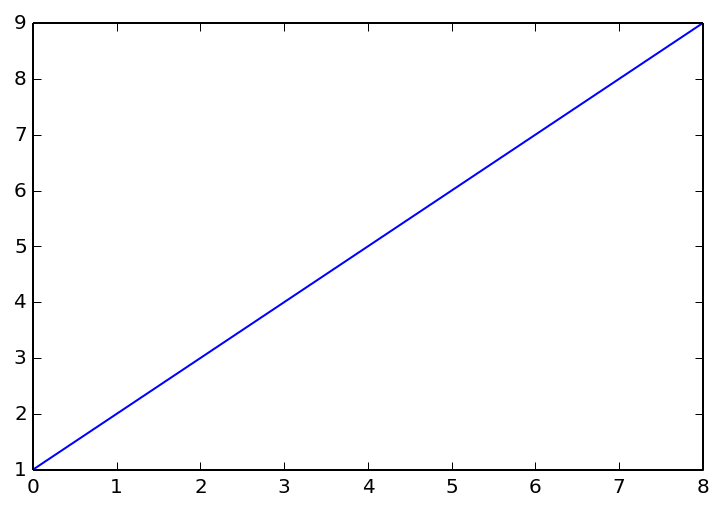

In [62]:
plt.plot(np.arange(1,10))

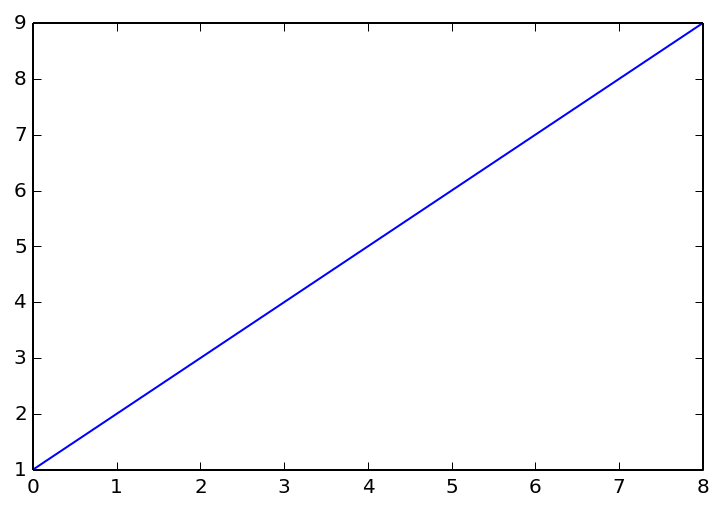

In [63]:
%matplotlib inline
plt.plot(np.arange(1,10))

In [64]:
%config InlineBackend.figure_format = 'svg'

In [65]:
%config InlineBackend.figure_format = 'retina'

In [66]:
cropped_map = plt.imread('./map.png')

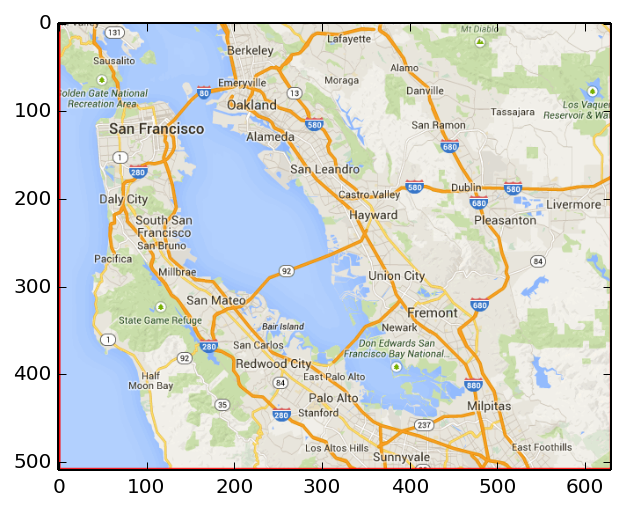

In [67]:
map_img = plt.imshow(cropped_map)

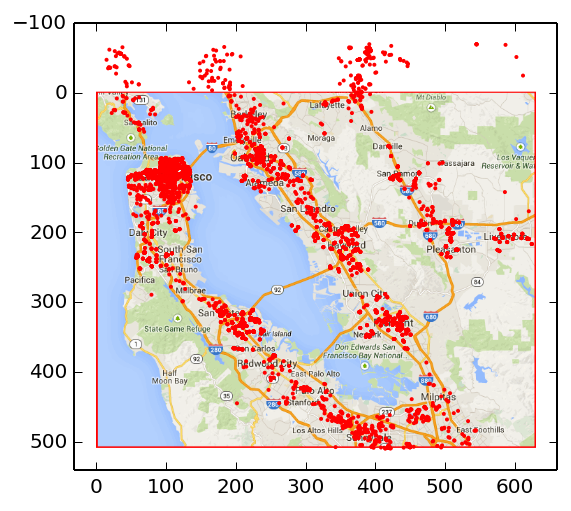

In [68]:
map_img = plt.imshow(cropped_map)
plt.scatter(array[:, 1], array[:, 0], s=4., c='r', linewidths=0)
plt.show()

In [69]:
array[:, 2].max()

14000.0

In [72]:
from scipy.interpolate import griddata
# define grid.
xi = np.arange(0,image_size[0])
yi = np.arange(0,image_size[1]+1)
# grid the data.
zi = griddata((array[:, 1], array[:, 0]), 
              array[:, 2], (xi[None,:], yi[:,None]), 
              method='linear', fill_value=array[:, 2].min())
overlay = plt.imread('./map_overlay.png')
zi = np.ma.masked_where(overlay[:,:,2]>0,zi)

plt.figure(figsize = (8,8))
plt.imshow(cropped_map)
plt.imshow(zi, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()

plt.title('2bd Apartment Monthly Rent')

IndexError: Inconsistant shape between the condition and the input (got (509, 630) and (511, 630))